# Lending Club Loan Data Analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get dataset
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


As we can see here, there is no NaN value in any column.

In [4]:
loan_df.shape

(9578, 14)

From data, we can say, we have few categorical columns like credit.policy, purpose and columns with limited range of values like inq.last.6mths, delinq.2yrs, pub.rec and not.fully.paid.

In [5]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### EDA Of numeric data

In [6]:
def hist_box_plot(col):
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    sns.histplot(data=loan_df, x= col, hue='credit.policy', kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(loan_df[col])
    plt.show()

In [7]:
def box_plot(df, col):
    sns.boxplot(df[col])
    plt.show()

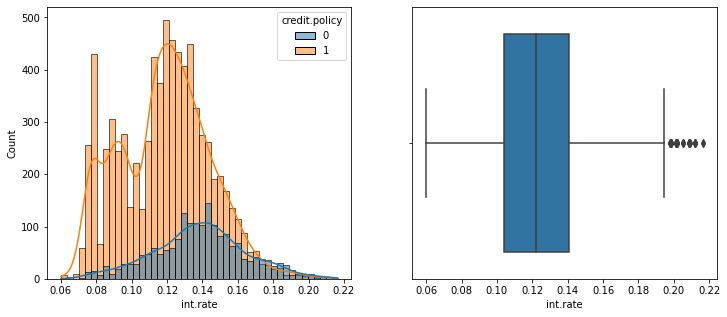

In [8]:
hist_box_plot('int.rate')

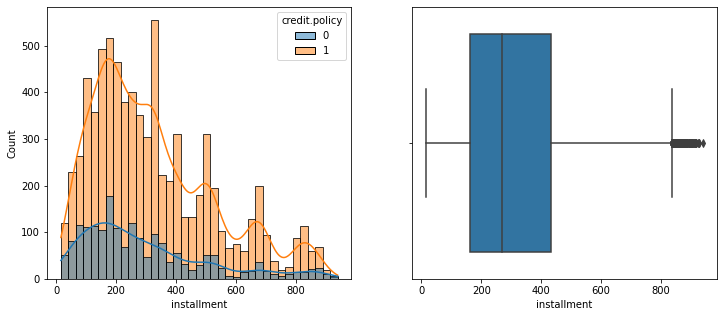

In [9]:
hist_box_plot('installment')

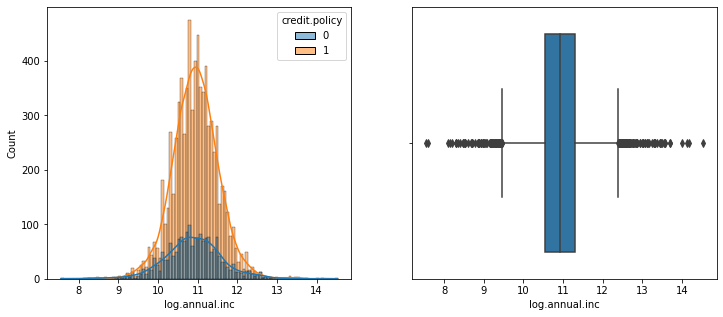

In [10]:
hist_box_plot('log.annual.inc')

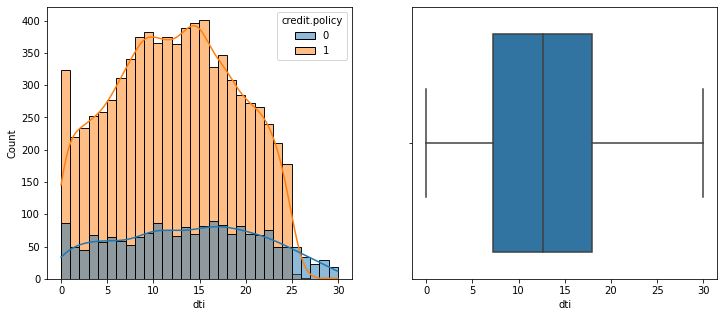

In [11]:
hist_box_plot('dti')

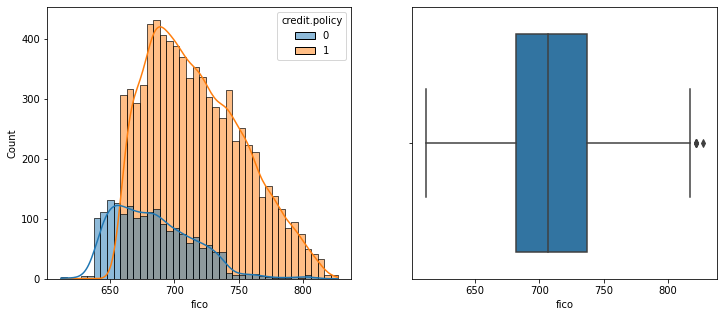

In [12]:
hist_box_plot('fico')

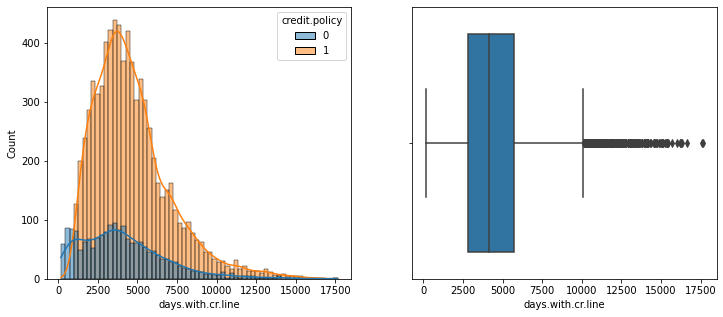

In [13]:
hist_box_plot('days.with.cr.line')

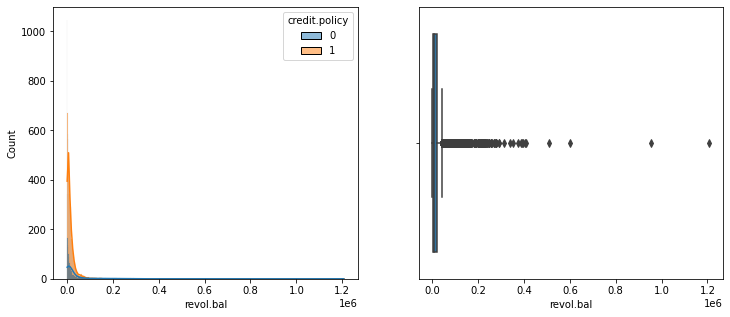

In [14]:
hist_box_plot('revol.bal')

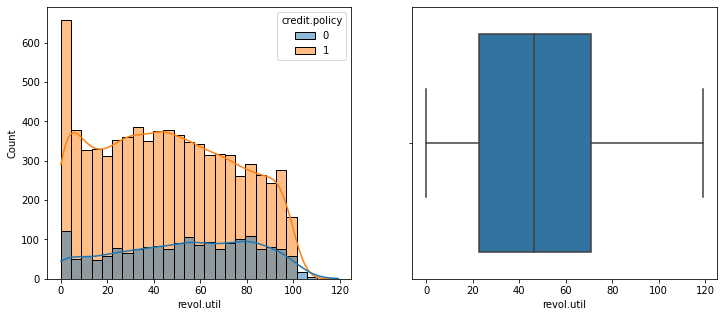

In [15]:
hist_box_plot('revol.util')

We are getting sensible distribution plots for the numeric values.
Also for customer meeting credit criteria, all the numeric column values are high.

We can remove the outlier by considering minimum data loss (max 5% data loss).

In [16]:
loan_df[loan_df['int.rate'] < 0.19].shape[0]/ loan_df.shape[0] * 100

99.01858425558572

In [17]:
filter_loan_df = loan_df[loan_df['int.rate'] < 0.19]

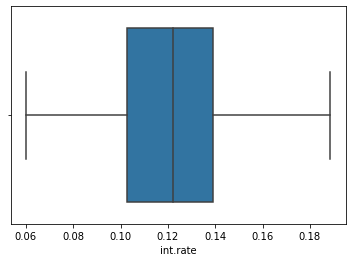

In [18]:
box_plot(filter_loan_df, 'int.rate')

In [19]:
loan_df = filter_loan_df

In [20]:
loan_df[loan_df['installment'] < 750].shape[0]/ loan_df.shape[0] * 100

95.08646140868832

In [21]:
filter_loan_df = loan_df[loan_df['installment'] < 750]

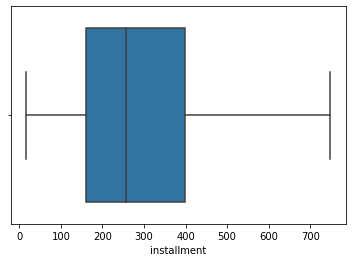

In [22]:
box_plot(filter_loan_df, 'installment')

In [23]:
loan_df = filter_loan_df

In [24]:
loan_df[(loan_df['log.annual.inc'] > 9.5) & (loan_df['log.annual.inc'] < 12.3)].shape[0]/ loan_df.shape[0] * 100

97.26103348857839

In [25]:
filter_loan_df = loan_df[(loan_df['log.annual.inc'] > 9.5) & (loan_df['log.annual.inc'] < 12.3)]

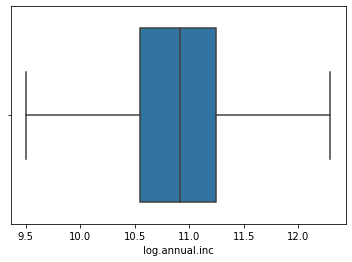

In [26]:
box_plot(filter_loan_df, 'log.annual.inc')

In [27]:
loan_df = filter_loan_df

In [28]:
loan_df[loan_df['fico'] < 820].shape[0]/ loan_df.shape[0] * 100

99.94299395735948

In [29]:
filter_loan_df = loan_df[loan_df['fico'] < 820]

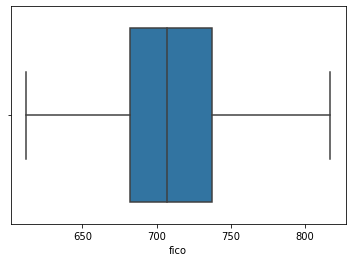

In [30]:
box_plot(filter_loan_df, 'fico')

In [31]:
loan_df = filter_loan_df

In [32]:
loan_df[loan_df['days.with.cr.line'] < 9300].shape[0]/ loan_df.shape[0] * 100

95.25439196897102

In [33]:
filter_loan_df = loan_df[loan_df['days.with.cr.line'] < 9300]

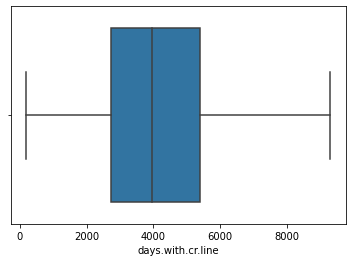

In [34]:
box_plot(filter_loan_df, 'days.with.cr.line')

In [35]:
loan_df = filter_loan_df

In [36]:
loan_df[loan_df['revol.bal'] < 0.05].shape[0]/ loan_df.shape[0] * 100

3.1137724550898205

We cant remove the outlier here, number of outliers are so high.

Now lets check the shape.

In [37]:
loan_df.shape

(8350, 14)

#### EDA on categorical data  & numeric with limited number of values

In [38]:
def count_plot(col, hue_val= None, rotate= False):
    sns.countplot(data= loan_df, 
                  x= col, 
                  hue= hue_val,
                  order = loan_df[col].value_counts().index)
    if rotate:
        plt.xticks(rotation=90)

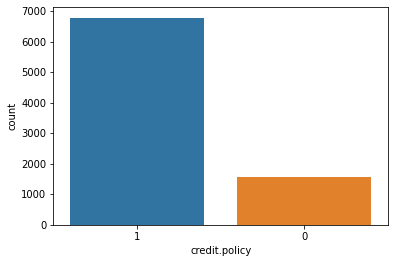

In [39]:
count_plot('credit.policy')

Its a imbalanced data.

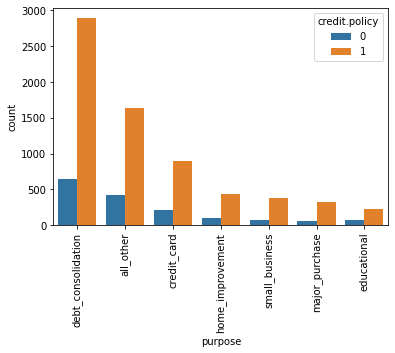

In [40]:
count_plot('purpose', hue_val='credit.policy', rotate= True)

Most of the loans are applied for debt_consolidation where as educational loan count is minimum.

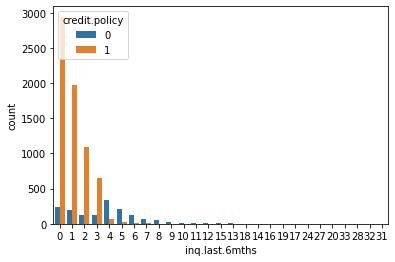

In [41]:
count_plot('inq.last.6mths', hue_val='credit.policy')

Most of the customers have 0-3 number of queries in last 6 months.

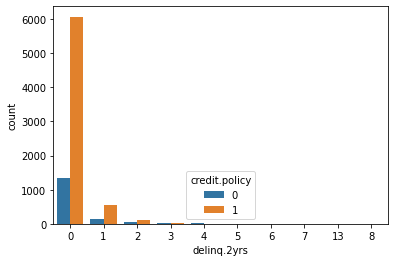

In [42]:
count_plot('delinq.2yrs', hue_val='credit.policy')

There are very few people with higher number of past dues.

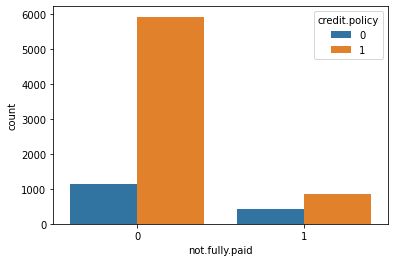

In [43]:
count_plot('not.fully.paid', hue_val='credit.policy')

There are many customers who have fully paid and are eligible for credit.

#### Additional Feature Engineering (Remove columns with high correlation if any with other feature columns)

In [44]:
loan_corr = loan_df.corr()

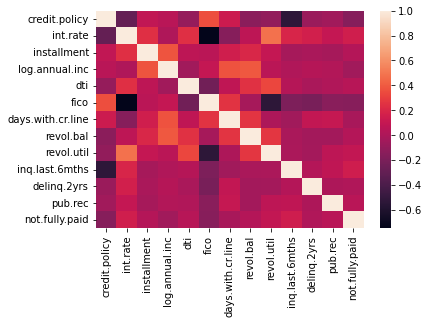

In [45]:
sns.heatmap(loan_corr)
plt.show()

There are many columns which are correlated with each other. As we have 13 feature columns and by looking at the column names, most of them are important features and impact the policy credit.

But we can filter out the columns with correlation among each other.

In [46]:
target_corr_cols = loan_corr['credit.policy'].sort_values(ascending=False)[1:].index.tolist()
target_corr_cols

['fico',
 'days.with.cr.line',
 'installment',
 'log.annual.inc',
 'pub.rec',
 'delinq.2yrs',
 'dti',
 'revol.util',
 'revol.bal',
 'not.fully.paid',
 'int.rate',
 'inq.last.6mths']

In [47]:
for col in target_corr_cols:
    corr_vals = loan_corr[col]
    corr_cols = corr_vals[corr_vals >= 0.6].index.tolist()
    print(col, corr_cols)

fico ['fico']
days.with.cr.line ['days.with.cr.line']
installment ['installment']
log.annual.inc ['log.annual.inc']
pub.rec ['pub.rec']
delinq.2yrs ['delinq.2yrs']
dti ['dti']
revol.util ['revol.util']
revol.bal ['revol.bal']
not.fully.paid ['not.fully.paid']
int.rate ['int.rate']
inq.last.6mths ['inq.last.6mths']


As we can see, we have set the high correlation lower limit as 0.6 and no columns are correlated with each other.

So we can use all the columns for modelling.

Now lets encode the purose column and get train and test dataset out of the loan_df.

#### Feature Transformation (Convert categorical values to numeric vectors)

In [48]:
loan_df_en = pd.get_dummies(data= loan_df, columns=['purpose'], drop_first=True, dtype= 'int64')

In [49]:
loan_df_en.shape

(8350, 19)

In [50]:
loan_df_en.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0


In [71]:
loan_df_en.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

#### Preprocessing steps for modelling

In [51]:
x = loan_df_en.drop(['credit.policy'], axis=1)
y = loan_df_en['credit.policy']

print(x.shape)
print(y.shape)

(8350, 18)
(8350,)


In [52]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6262, 18)
(2088, 18)
(6262,)
(2088,)


In [53]:
# Standardize the values

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

#### Deep Learning Model

In [54]:
model = Sequential()
model.add(Dense(128, activation= 'relu', input_shape=(18,),
                kernel_initializer='he_normal', 
                kernel_regularizer='L2'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation= 'relu',
                kernel_initializer='he_normal', 
                kernel_regularizer='L2'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation= 'relu',
                kernel_initializer='he_normal', 
                kernel_regularizer='L2'))
model.add(BatchNormalization())
model.add(Dense(10, activation= 'relu',
                kernel_initializer='he_normal', 
                kernel_regularizer='L2'))
model.add(Dense(1, activation= 'sigmoid',
               kernel_initializer='glorot_normal', 
               kernel_regularizer='L2'))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [56]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.binary_crossentropy,
                metrics=[tf.keras.metrics.AUC()])

In [57]:
callback = EarlyStopping(monitor='val_loss', patience=5)

In [58]:
history = model.fit(
x_train, y_train,
validation_data=(x_test, y_test),
batch_size= 30,
epochs= 20,
verbose=1,
callbacks=[callback]
)

Epoch 1/20
209/209 [==============================] - 3s 5ms/step - loss: 4.2353 - auc: 0.6486 - val_loss: 3.1175 - val_auc: 0.8656
Epoch 2/20
209/209 [==============================] - 1s 4ms/step - loss: 2.4746 - auc: 0.8194 - val_loss: 1.8458 - val_auc: 0.9184
Epoch 3/20
209/209 [==============================] - 1s 5ms/step - loss: 1.5379 - auc: 0.8478 - val_loss: 1.1667 - val_auc: 0.9327
Epoch 4/20
209/209 [==============================] - 1s 5ms/step - loss: 1.0066 - auc: 0.8807 - val_loss: 0.7855 - val_auc: 0.9406
Epoch 5/20
209/209 [==============================] - 1s 5ms/step - loss: 0.7113 - auc: 0.8983 - val_loss: 0.5892 - val_auc: 0.9428
Epoch 6/20
209/209 [==============================] - 1s 4ms/step - loss: 0.5565 - auc: 0.9007 - val_loss: 0.4831 - val_auc: 0.9459
Epoch 7/20
209/209 [==============================] - 1s 4ms/step - loss: 0.4541 - auc: 0.9160 - val_loss: 0.4052 - val_auc: 0.9462
Epoch 8/20
209/209 [==============================] - 1s 5ms/step - loss: 0.

In [59]:
history = pd.DataFrame(history.history)
history.head()

,loss,auc,val_loss,val_auc
0,4.235277,0.648598,3.117543,0.865618
1,2.474607,0.819444,1.845755,0.918365
2,1.537950,0.847843,1.166706,0.932721
3,1.006636,0.880666,0.785537,0.940568
4,0.711283,0.898319,0.589222,0.942774


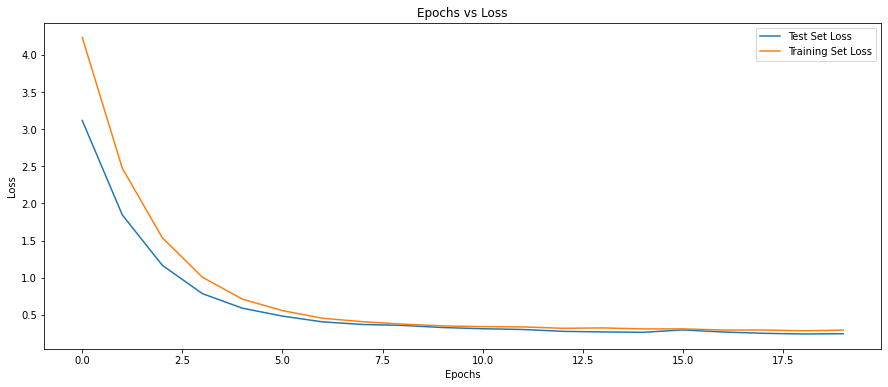

In [60]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

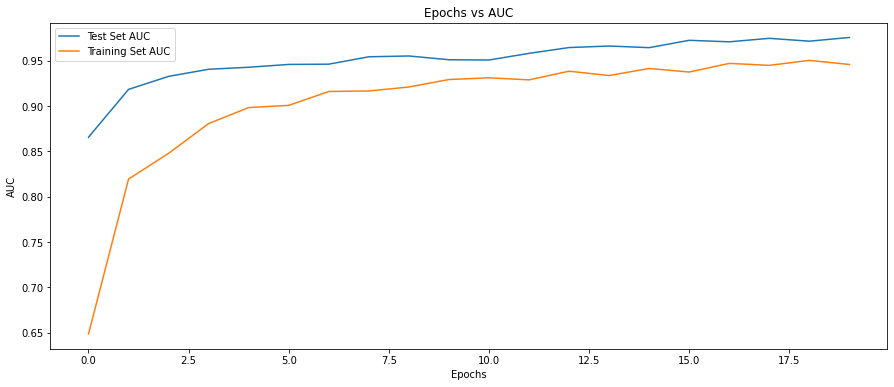

In [61]:
plt.figure(figsize = (15,6))
plt.plot(history.val_auc, label='Test Set AUC')
plt.plot(history.auc, label='Training Set AUC')
plt.title('Epochs vs AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [69]:
y_train_pred = model.predict(x_train)
cm1 = confusion_matrix(y_train, y_train_pred>0.5)
cm1

array([[ 847,  343],
       [  59, 5013]])

In [70]:
y_test_pred = model.predict(x_test)
cm2 = confusion_matrix(y_test, y_test_pred>0.5)
cm2

array([[ 256,  124],
       [  20, 1688]])

In [64]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
auc_score_train = auc(fpr_train, tpr_train)
print(auc_score_train)

0.9805026111390929


In [65]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
auc_score_test = auc(fpr_test, tpr_test)
print(auc_score_test)

0.9757780722297548


In [66]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train:{}%, Test: {} %'.format((train_acc*100), (test_acc*100)))

Train:98.04953336715698%, Test: 97.56362438201904 %


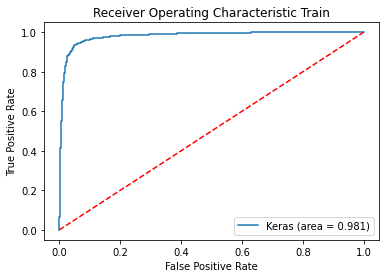

In [67]:
# Plot TPR FPR train
plt.title('Receiver Operating Characteristic Train')
plt.plot(fpr_train, tpr_train, label='Keras (area = {:.3f})'.format(auc_score_train))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

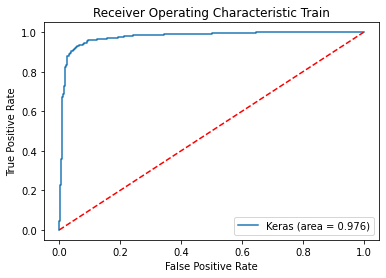

In [68]:
# Plot TPR FPR test
plt.title('Receiver Operating Characteristic Train')
plt.plot(fpr_test, tpr_test, label='Keras (area = {:.3f})'.format(auc_score_test))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We received good scores with this model and given data.